In [720]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.special import comb

N = 1000
rng = np.random.default_rng()


# Finding $Pr[\text{SS remains at home}]$


In [721]:
def prob_remains_home(n):
    return comb(2 * n, n) * (0.5 ** n) * (0.5 ** n)

In [722]:
ns = np.arange(1, N + 1)
ps = prob_remains_home(ns)

<AxesSubplot: >

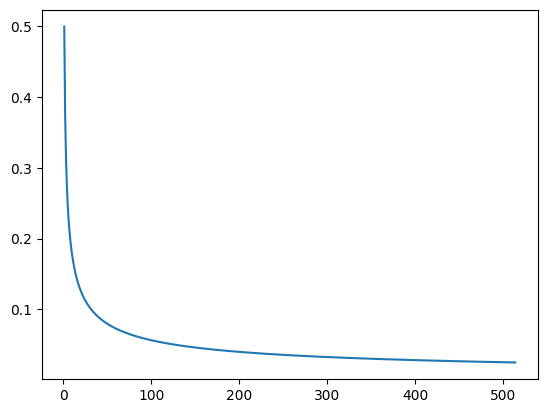

In [723]:
sns.lineplot(x=ns, y=ps)

# Finding $\mathbb E[\text{SS comes home}]$

In [724]:
def simulate_rd_walk_once(n):
    directions = rng.choice([-1, 1], n, replace=True)
    locations = np.cumsum(directions)
    return locations.size - np.count_nonzero(locations)

def avg_simulate_rd_walk(n):  # simulate N times and avg
    sim_results = [simulate_rd_walk_once(n) for _ in range(N)]
    return np.mean(sim_results)

In [725]:
ps = [avg_simulate_rd_walk(n) for n in ns]

<AxesSubplot: >

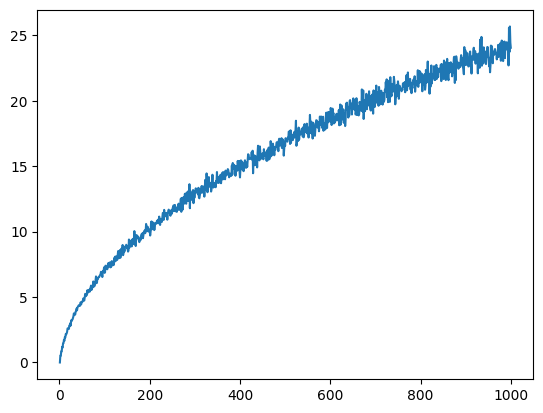

In [726]:
sns.lineplot(x=ns, y=ps)

In [727]:
def simulate_rd_walk(max_n):  # simulate N times and avg
    sim_results = []
    for n in range(1, max_n + 1):
        new_results = [{"n": n, "Home visits": simulate_rd_walk_once(n), "Iteration": i} for i in range(N)]
        sim_results = sim_results + new_results
    return pd.DataFrame(sim_results)

df_probs = simulate_rd_walk(N)
df_probs.sample(10)

,n,Home visits,Iteration
52522,53,6,522
844852,845,26,852
298337,299,6,337
386733,387,29,733
878617,879,29,617
921105,922,14,105
324191,325,4,191
755966,756,38,966
669466,670,26,466
845409,846,2,409


<AxesSubplot: xlabel='n', ylabel='Home visits'>

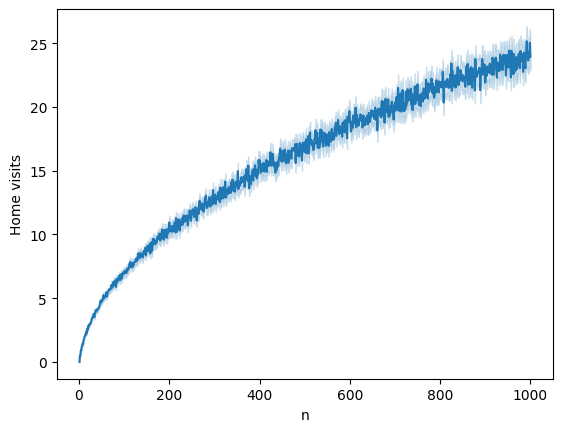

In [728]:
sns.lineplot(df_probs, x="n", y="Home visits")